# Protocol Data Blob 

Goal: load protocol data blob in from matlab & unpack

Protocol Data structure for DMS:

| variable             | values          | key                                                 |
|----------------------|-----------------|-----------------------------------------------------|
| `hit_history`        | [0, 1, NaN]     | [error, hit, violation]                             |
| `temp_error_history` | [0, 1, NaN]     | [no terror, terror, violation]                      |
| `side_history`       | [l, r]          | [left, right]                                       |
| `result_history`     | [1, 2, 3, 4, 5] | [hit, error, violation, terror, crash]              |
| `sa`                 | float           | value of sa in Hz                                   |
| `sb`                 | float           | value of sb in Hz                                   |
| `dms_type`           | [0, 1]          | [nonmatch, match]                                   |
| `delay`              | float           | duration of delay between sa/sb in s                |
| `fixation`           | float           | duration of pre --> go (fixation required or not)   |
| `timeouts`           | float           | duration of timeout in s                            |
| `helper`             | [0, 1]          | if trial was in helper block (not in use currently) |
| `stage`              | float           | stage number                                        |


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import datajoint as dj
import pandas as pd
import os
import seaborn as sns
import pandas as pd
from pathlib import Path
from datetime import date 

from io_utils import *

# settings
%reload_ext autoreload
%autoreload 2
dj.blob.use_32bit_dims = True # necessary for pd.blob read
 

### Single Session

In [52]:
# grab protocol data from a session
bdata = dj.create_virtual_module('new_acquisition', 'bdatatest')
session_key = {'sessid': 879663}
session_data = (bdata.Sessions & session_key).fetch('protocol_data', as_dict=True)

In [17]:
protocol_dict = convert_to_dict(session_data)
for key,value in protocol_dict[0].items():

    print(f"{key} length:{len(value)}")

hits length:67
temperror length:67
sides length:67
result length:59
sa length:67
sb length:68
dms_type length:67
delay length:67
fixation length:67
timeouts length:67
helper length:67
stage length:67


In [53]:
animal_id = 'R501'
sessid =  session_key['sessid']
date = "2022-07-19"
protocol_dict = convert_to_dict(session_data)
# protocol_df = make_protocol_df(protocol_dict, animal_id, [date], [sessid])

# protocol_df.head()

In [56]:
prepare_dict_for_df(protocol_dict[0])

### Multi Session

In [141]:
len = 5

if not len:
    print('ya')


In [152]:
df = fetch_latest_protocol_data()

fetched 31 sessions for R500
fetched 33 sessions for R501
fetched 34 sessions for R502
fetched 32 sessions for R503
fetched 34 sessions for R600


In [34]:
for _id, animal_df in df.groupby('animal_id'):
    print(_id)
animal_df

R500
R501
R502
R503
R600


,trial,animal_id,date,sessid,hits,temperror,sides,result,sa,sb,delay,fixation,timeouts,helper,stage,is_match
0,1,R600,2022-07-19,879484.0,1,0,l,1,3.0,3.0,0.10,1.10,NaN,0,1,True
1,2,R600,2022-07-19,879484.0,1,0,r,1,12.0,3.0,0.10,0.50,NaN,0,1,False
2,3,R600,2022-07-19,879484.0,1,0,l,1,3.0,3.0,0.10,0.50,NaN,0,1,True
3,4,R600,2022-07-19,879484.0,1,0,l,1,12.0,12.0,0.10,0.50,NaN,0,1,True
4,5,R600,2022-07-19,879484.0,1,0,l,1,12.0,12.0,0.10,0.50,NaN,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,220,R600,2022-08-20,882776.0,0,0,l,2,3.0,3.0,0.05,0.56,0.50,0,4,True
220,221,R600,2022-08-20,882776.0,0,0,l,2,3.0,3.0,0.05,0.56,0.50,0,4,True
221,222,R600,2022-08-20,882776.0,1,0,r,1,12.0,3.0,0.05,0.56,NaN,0,4,False
222,223,R600,2022-08-20,882776.0,<NA>,<NA>,l,3,3.0,3.0,0.05,0.56,3.75,0,4,True


In [35]:
for sa_sb, sa_sb_df in animal_df.groupby(['sa', 'sb']):
    print(sa_sb)

(3.0, 3.0)
(3.0, 12.0)
(12.0, 3.0)
(12.0, 12.0)


In [42]:
animal_df.groupby(['sa','sb']).mean().hits

sa    sb  
3.0   3.0     0.352140
      12.0    0.757835
12.0  3.0     0.755814
      12.0    0.442013
Name: hits, dtype: float64

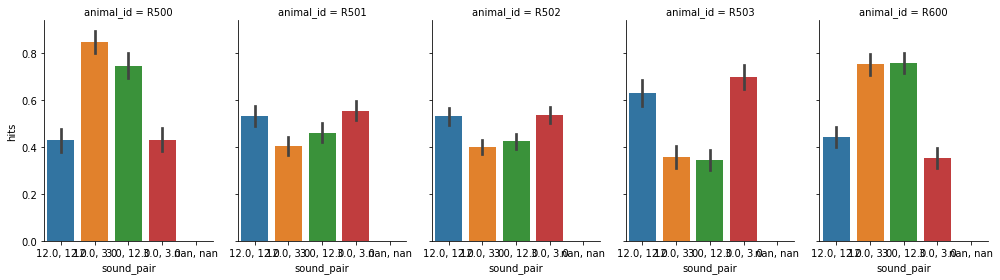

In [153]:
g = sns.catplot(x="sound_pair", y="hits", col="animal_id",
                data=df, kind="bar",
                height=4, aspect=.7)

<AxesSubplot:xlabel='sa', ylabel='hits'>

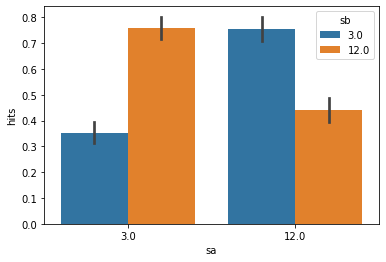

In [59]:
sns.barplot(data=animal_df,x='sa',hue='sb',y='hits')

In [78]:
df.groupby(['animal_id', 'sa','sb']).mean()

trial         sessid      hits  temperror     delay  \
animal_id sa   sb                                                               
R500      3.0  3.0    40.318182  881043.360000  0.431034   0.129310  0.118182   
               12.0   39.771261  880615.193548  0.747826   0.156522  0.129032   
          12.0 3.0    37.400000  880596.440625  0.849057   0.113208  0.128438   
               12.0   40.146429  881070.069643  0.429348   0.171196  0.117143   
R501      3.0  3.0    79.533262  881215.769313  0.556465   0.095541  0.140773   
               12.0   79.550740  881057.367865  0.461173   0.130769  0.137230   
          12.0 3.0    79.262278  881053.599791  0.403566   0.129890  0.137053   
               12.0   77.154525  881142.397351  0.532573   0.103774  0.136766   
R502      3.0  3.0   105.469824  881236.757066  0.539189   0.060766  0.105462   
               12.0   98.889257  881002.377321  0.425188   0.069864  0.106963   
          12.0 3.0    98.826793  880981.106901  0.401117   0.072589  0.105717   
               12.0   99.737819  881165.836040  0.533428   0.065097  0.106226   
R503      3.0  3.0    53.755467  880742.079523  0.698462   0.209581  0.115706   
               12.0   52.494203  880857.326087  0.343891   0.209402  0.113333   
          12.0 3.0    52.818457  880875.558245  0.356265   0.159722  0.112405   
               12.0   53.778656  880671.687747  0.632787   0.282051  0.119368   
R600      3.0  3.0    55.933251  881343.906057  0.352140   0.085271  0.105871   
               12.0   51.290262  880998.426966  0.757835   0.124646  0.116105   
          12.0 3.0    48.857426  880857.855446  0.755814   0.159884  0.121683   
               12.0   58.963415  881315.132791  0.442013   0.102845  0.105420   

                     fixation  timeouts  helper  is_match  
animal_id sa   sb                                          
R500      3.0  3.0   0.711152  0.726000       0      True  
               12.0  0.759682  0.729142       0     False  
          12.0 3.0   0.750150  0.806429       0     False  
               12.0  0.701848  0.720833       0      True  
R501      3.0  3.0   0.887035  0.886090       0      True  
               12.0  0.835934  0.873679       0     False  
          12.0 3.0   0.841327  0.874845       0     False  
               12.0  0.869424  0.822029       0      True  
R502      3.0  3.0   0.603794  1.212111       0      True  
               12.0  0.583117  0.998360       0     False  
          12.0 3.0   0.579066  0.964161       0     False  
               12.0  0.601248  1.204124       0      True  
R503      3.0  3.0   0.674454  0.646920       0      True  
               12.0  0.717329  0.678439       0     False  
          12.0 3.0   0.722133  0.707413       0     False  
               12.0  0.700846  0.679073       0      True  
R600      3.0  3.0   0.637958  0.922420       0      True  
               12.0  0.669081  1.070746       0     False  
          12.0 3.0   0.684321  1.075367       0     False  
               12.0  0.631443  0.999925       0      True

In [95]:
sns.lineplot(data=animal_df.groupby(['date','sa','sb']).mean(),
    x=['sa','sb'],y='hits',palette='cividis')

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 131 and the vector passed to `x` has length 2.

<AxesSubplot:xlabel='sa', ylabel='sb'>

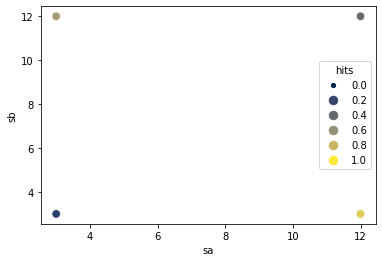

In [57]:
sns.scatterplot(data=animal_df.groupby(['date','sa','sb']).mean(),
    x='sa',y='sb',size='hits',hue='hits',palette='cividis')

sa: 3.0, sb: 3.0
sa: 3.0, sb: 12.0
sa: 12.0, sb: 3.0
sa: 12.0, sb: 12.0


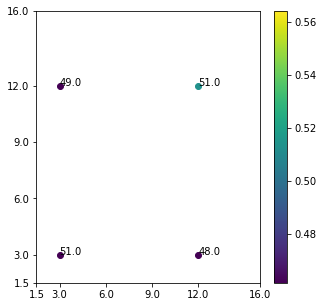

In [36]:
"""Plotting the average performance for 
sa,sb pairs for 1 animal across all sessions"""
plt.subplots(1,1, figsize=(5,5))
sns.despine
for (sa,sb), sa_sb_df in df.groupby(['sa', 'sb']):
    print(f"sa: {sa}, sb: {sb}")
    performance = sa_sb_df['hits'].mean(skipna=True)
    plt.scatter(sa, sb, c = performance)
    plt.annotate(str(np.round(performance * 100, 0)), (sa,sb))

cbar = plt.colorbar()
y = plt.yticks([1.5, 3, 6, 9, 12, 16])
x = plt.xticks([1.5, 3, 6, 9, 12, 16])
    

TODO: 
* figure out where nas are coming from 
* order the sa/sb category
For each animal:
* line plot of sa/sb perf across days given new column (4 lines)
* line plot of fixation across days
* line plot of hit rate / viol rate across days
Long term:
* filtering df by day via datetime
* quering sessions table for stage info, bias etc w/ sessid
    * add same day check

In [241]:
animal_df.groupby("trial").mean()

,sessid,hits,temperror,sa,sb,dms_type,delay,fixation,timeouts,helper
trial,,,,,,,,,,
1,880463.923077,0.800000,0.200000,7.500000,8.538462,0.423077,0.134615,1.100000,0.500000,0
2,880463.923077,0.666667,0.166667,7.500000,7.846154,0.423077,0.134615,0.683492,0.471429,0
3,880463.923077,0.578947,0.263158,8.538462,7.153846,0.538462,0.134615,0.684281,0.497333,0
4,880463.923077,0.687500,0.250000,8.192308,7.153846,0.500000,0.134615,0.685085,0.511667,0
5,880463.923077,0.777778,0.166667,7.500000,8.538462,0.653846,0.134615,0.685436,0.515417,0
...,...,...,...,...,...,...,...,...,...,...
118,880566.000000,NaN,NaN,3.000000,12.000000,0.000000,0.100000,0.608960,2.350000,0
119,880566.000000,0.000000,0.000000,3.000000,3.000000,1.000000,0.100000,0.608960,0.500000,0
120,880566.000000,0.000000,0.000000,3.000000,3.000000,1.000000,0.100000,0.610960,0.500000,0


ValueError: cannot reindex from a duplicate axis

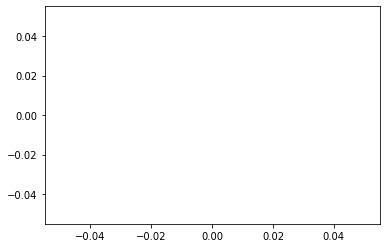

In [242]:
# def my_plot(ax, _df):
    
ax = plt.gca()
sns.lineplot(data=animal_df, x="trial", y='hits',ax=ax)

In [232]:
n_plots = len(xx.animal_id.unique())
plt.subplots(n_plots, 1, figsize=(10,8))

for aid, animal_df in xx.groupby('animal_id'):
    print(aid)
animal_df

R500
R600


,trial,animal_id,date,sessid,hits,temperror,sides,result,sa,sb,dms_type,delay,fixation,timeouts,helper,stage
0,1,R600,2022-07-19,879484.0,1,0,l,1,3.0,3.0,True,0.1,1.100000,NaN,0,1
1,2,R600,2022-07-19,879484.0,1,0,r,1,12.0,3.0,False,0.1,0.500000,NaN,0,1
2,3,R600,2022-07-19,879484.0,1,0,l,1,3.0,3.0,True,0.1,0.500000,NaN,0,1
3,4,R600,2022-07-19,879484.0,1,0,l,1,12.0,12.0,True,0.1,0.500000,NaN,0,1
4,5,R600,2022-07-19,879484.0,1,0,l,1,12.0,12.0,True,0.1,0.500000,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,27,R600,2022-08-13,881572.0,0,1,l,4,3.0,3.0,True,0.1,0.528297,0.820,0,4
27,28,R600,2022-08-13,881572.0,<NA>,<NA>,l,3,12.0,12.0,True,0.1,0.530297,0.850,0,4
28,29,R600,2022-08-13,881572.0,<NA>,<NA>,l,3,3.0,3.0,True,0.1,0.530297,0.875,0,4
29,30,R600,2022-08-13,881572.0,<NA>,<NA>,l,3,3.0,3.0,True,0.1,0.530297,0.900,0,4


### Multi animal query



In [245]:
rats = ['R500', 'R501']
key = [{'ratname' : rat} for rat in rats]

pdata = (bdata.Sessions & key).fetch('protocol_data', as_dict=True)

[2022-08-15 15:57:59,377][WARNING]: MySQL server has gone away. Reconnecting to the server.


In [252]:
pdicts = convert_to_dict(pdata)

AttributeError: 'list' object has no attribute 'keys'

In [255]:
pdicts[0].keys()

dict_keys(['hits', 'temperror', 'sides', 'result', 'sa', 'sb', 'dms_type', 'delay', 'fixation', 'timeouts', 'helper', 'stage'])

#### scraps

In [ ]:
dd = convert_to_dicts(session_data)
dfs = make_protocol_df(dd, ['R500'], ['2022-07-08'], ['su2129'])

updating sb values to be correct


In [157]:
for key in protocol_dict.keys():
    print(f"{key} type:{type(protocol_dict[key][0])} ")

hits type:<class 'numpy.float64'> 
temperror type:<class 'numpy.float64'> 
sides type:<class 'str'> 
result type:<class 'numpy.float64'> 
sa type:<class 'numpy.float64'> 
sb type:<class 'numpy.float64'> 
dms_type type:<class 'numpy.bool_'> 
delay type:<class 'numpy.float64'> 
fixation type:<class 'numpy.float64'> 
timeouts type:<class 'numpy.float64'> 
helper type:<class 'numpy.float64'> 
stage type:<class 'numpy.float64'> 


In [156]:
for key,value in protocol_dict.items():

    `print(f"{key} length:{len(value)}")

hits length:45
temperror length:45
sides length:45
result length:45
sa length:45
sb length:45
dms_type length:45
delay length:45
fixation length:45
timeouts length:45
helper length:45
stage length:45


Additional functions:
* read in pd data for an animal or default group
* or maybe have a load_last lag for the fetch_lastest

VARS:
SAVE_DIR
ANIMAL_IDS

Order:

fetch_latest_protocol_data

convert_to_dict 
* takes blob(s)
* calls mym_blob_to_dict
* returns list of dictonaries

make_protocol_df
* takes dicts, animal id, sessions, dates
* calls correct_sb
* calls clean_protocol_df
* returns list of dataframes

saves out animals data frame as csv

by defualt returns a dictonary with animal name as keys, can also return a list of df instead




In [181]:
as_dict = True
x = 7
[x + 3]  if as_dict is True else x - 3

x

7